Initial Position Probability: 
bel(x0) =>  p0 = 0.25, p1 = 0.25, p2 = 0.25, p3 = 0.25, 


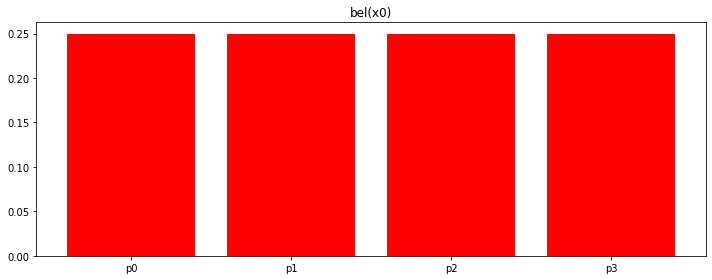



State Transition Probability Matrix @ x1: 
[[0.2 0.  0.  0. ]
 [0.6 0.2 0.  0. ]
 [0.2 0.6 0.2 0. ]
 [0.  0.2 0.6 0.2]]

Calculations of bel_bar for all potential locations (p0~p3):
bel_bar(x1) =>  p0 = 0.05, p1 = 0.2, p2 = 0.25, p3 = 0.25, 

Probability of the robot sensing the DOOR at step = 1
Door Detected: [[0.4  0.85 0.4  0.85]]

Normalization and η calculation:
eta1 =  1.990049751243781

New updated belief of the robot's localization probability after step 1:
bel(x1) =>  p0 = 0.03980099502487563, p1 = 0.3383084577114428, p2 = 0.1990049751243781, p3 = 0.42288557213930345, 


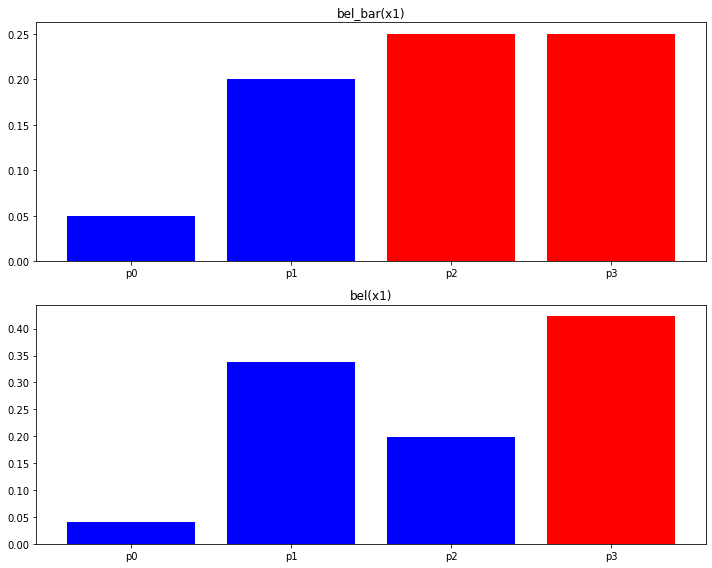



State Transition Probability Matrix @ x2: 
[[0.2 0.  0.  0. ]
 [0.6 0.2 0.  0. ]
 [0.2 0.6 0.2 0. ]
 [0.  0.2 0.6 0.2]]

Calculations of bel_bar for all potential locations (p0~p3):
bel_bar(x2) =>  p0 = 0.007960199004975126, p1 = 0.09154228855721394, p2 = 0.25074626865671645, p3 = 0.27164179104477615, 

Probability of the robot sensing the WALL at step = 2
Wall Detected: [[0.6  0.15 0.6  0.15]]

Normalization and η calculation:
eta2 =  4.768683274021352

New updated belief of the robot's localization probability after step 2:
bel(x2) =>  p0 = 0.015183867141162516, p1 = 0.37105575326215895, p2 = 0.47829181494661926, p3 = 1.101067615658363, 


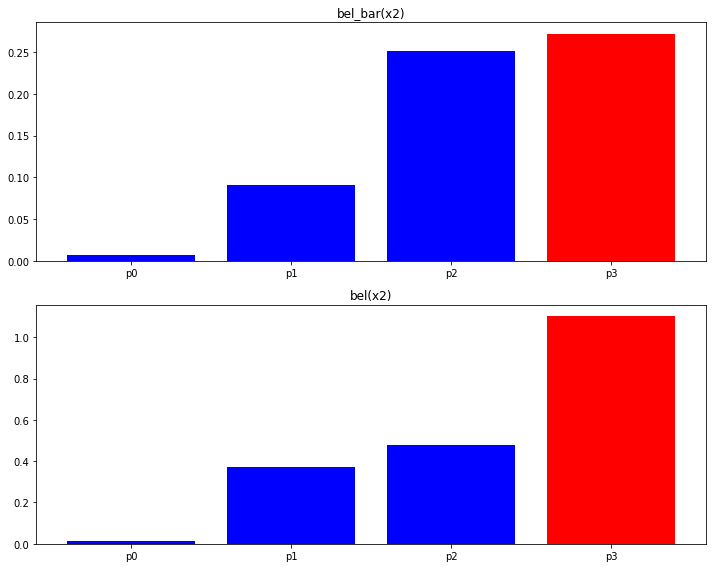



State Transition Probability Matrix @ x3: 
[[0.2 0.  0.  0. ]
 [0.6 0.2 0.  0. ]
 [0.2 0.6 0.2 0. ]
 [0.  0.2 0.6 0.2]]

Calculations of bel_bar for all potential locations (p0~p3):
bel_bar(x3) =>  p0 = 0.0030367734282325033, p1 = 0.0833214709371293, p2 = 0.32132858837485173, p3 = 0.5813997627520759, 

Probability of the robot sensing the DOOR at step = 3
Door Detected: [[0.4  0.85 0.4  0.85]]

Normalization and η calculation:
eta3 =  1.4393476323329042

New updated belief of the robot's localization probability after step 3:
bel(x3) =>  p0 = 0.0017483890575431722, p1 = 0.10193927762847416, p2 = 0.18500141715128687, p3 = 0.7113109161626958, 


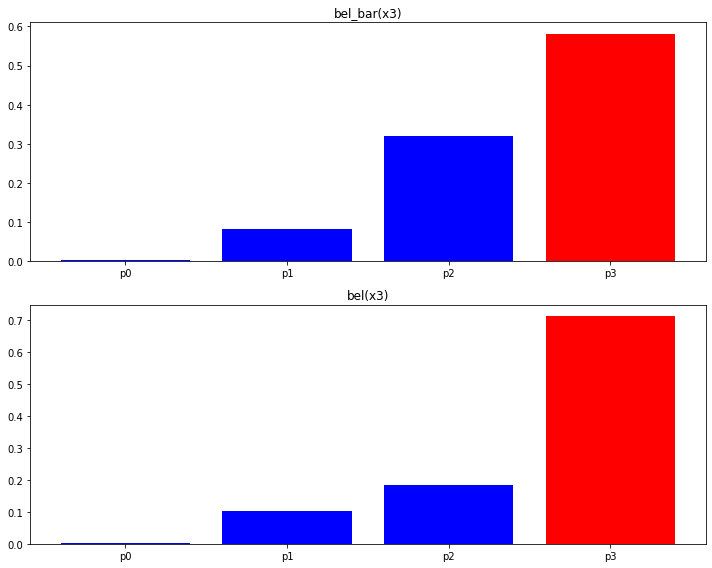

In [2]:
import numpy as np
import matplotlib.pyplot as plt

'''
    Using inheritance to solve a robot localizaton problem. The following classes with there properties and methods are used:
        -RobotBase:
            properties:
                -door_sense:  numpy.matrix()
                -wall_sense: numpy.matrix()
                -labels: list of string
                -eta: list of float
                -bel_x: list of numpy.matrix()
                -state_trans_prob: numpy.matrix() 
                -bel_bar_x: list of numpy.matrix()
            methods:
                -bel_bar_calc(): list of numpy.matrix()
                -eta_calc(): numpy.matrix()
                -s_print(): string
                -plot_bar(): used to plot bar graphs on localization data
                -plot_color(): used to define the color of the plotted bar graphs in plot_bar()

        -Robot2:
            methods:
                -super().__init__(): a python function that will automatically inherit the methods and properties from its parent. 

                
'''
#### chances of sensing a wall or door 
door_sense={"wall_p0":0.4,"door_p1":0.85,"wall_p2":0.4,"door_p3":0.85}
wall_sense={"wall_p0":0.6,"door_p1":0.15,"wall_p2":0.6,"door_p3":0.15}

#the robot's state transition probability matrix
grid_prob=np.matrix([[0.2,0,0,0],
                     [0.6,0.2,0,0],
                     [0.2,0.6,0.2,0],
                     [0,0.2,0.6,0.2]])
#likelihood of the robot's initial position
init_bel_x={"p0":0.25,"p1":0.25,"p2":0.25,"p3":0.25}
#number of steps the robot takes
steps=3

class RobotBase:
    #the constructor of the RobotBase class
    def __init__(self,door_sense,wall_sense,grid_prob,init_bel_x,steps):
        #RobotBase properties
        self.door_sense=np.matrix([door_sense[x] for x in door_sense])
        self.wall_sense=np.matrix([wall_sense[x] for x in wall_sense])
        self.labels=[p for p in init_bel_x]
        self.eta=[]
        self.bel_x=[np.matrix([init_bel_x[x] for x in init_bel_x]).reshape(len(init_bel_x),1)]
        self.state_trans_prob=grid_prob
        self.bel_bar_x=self.bel_bar_calc(steps)
        
    #determines the the probability of the robot's location in next step
    def bel_bar_calc(self,steps):
        '''
        bel_bar is calculated by multiplying a state tranisition matrix with the belief matrix
        '''   
        belBar=[]
        print("Initial Position Probability: ")
        print(f"bel(x{0}) => ",self.s_print(self.bel_x[0]))
        
        #plots and saves a bar graph of the initial probability of where the robot is likely to be
        fig1=plt.figure(figsize=(10,4)) 
        plt.subplot(1,1,1)
        plt.title(f"bel(x{0})")
        plt.bar(self.labels,[nB[0] for nB in self.bel_x[0].tolist()],color=self.plot_color(self.bel_x[0]))
        plt.tight_layout()
        fig1.savefig(f"step{0}.png")
        plt.show()
        
        #cycles through the number steps the robot take and calculations of bel_bar for all potential locations (p0~p3)
        #calculates a new belief of the robot's localization probability after sensor uncertainties are considered 
        for step in range(steps):
            print(f"\n\nState Transition Probability Matrix @ x{step+1}: ")
            print(self.state_trans_prob)
            
            #the step's bel_bar is calculated
            bBar=self.state_trans_prob * self.bel_x[step]
            print("\nCalculations of bel_bar for all potential locations (p0~p3):")
            print(f"bel_bar(x{step+1}) => ",self.s_print(bBar))
            belBar.append(bBar)
            
            #robot's new belief is determined after sensor uncertainty is considerd
            new_bel=self.eta_calc(bBar,step)
            print(f"\nNew updated belief of the robot's localization probability after step {step+1}:")
            print(f"bel(x{step+1}) => ",self.s_print(new_bel))
            
            #plots a bar graph of the step's bel_bar and new_bel
            self.bel_x.append(new_bel)
            self.plot_bar(step=step,bBar=bBar,nbel=new_bel)
        return belBar
            
    def eta_calc(self, bel_Bar,step):
        '''
        calculating eta based on wall or door sense
        
        '''
        new_eta=0
        newBel=0
        odd=(step+1)%2
        door=self.door_sense
        wall=self.wall_sense
        
        #when step is odd then use door sensing uncertainty (door_sense) numbers
        if odd:
            print(f"\nProbability of the robot sensing the DOOR at step = {step+1}")
            print("Door Detected:", door)
            #calculate the new eta and new bel
            d=door*bel_Bar
            new_eta=(1/d.tolist()[0][0])
    
            newBel=new_eta*np.multiply(door,bel_Bar.reshape(1,4))
            
        #else use wall sensing (wall_sense) uncertainity numbers
        else:
            print(f"\nProbability of the robot sensing the WALL at step = {step+1}")
            print("Wall Detected:", wall)
            #calculate the new eta and new bel
            d=wall*bel_Bar
            new_eta=1/d.tolist()[0][0]
            newBel=new_eta*np.multiply(door,bel_Bar.reshape(1,4))
           
        print("\nNormalization and η calculation:")
        print(f"eta{step+1} = ",new_eta)
        self.eta.append(new_eta)
       
        #calculate and return the robot's new belief of where it is located based on sensor uncertainties
        return newBel.reshape(4,1)
    
    def s_print(self,data):
        '''
            unpacks matrix data and prints individual values
        '''
        special_string=""
        for i in range (len(data)):
            special_string+=f"p{i} = {data[i].tolist()[0][0]}, "
        return special_string
    
    def plot_bar(self,step,bBar,nbel):
        '''
            plots bel_bar and new_bel as bar plots
        '''
        j=2
        fig=plt.figure(figsize=(10,8))  
        plt.subplot(j,1,1)
        plt.title(f"bel_bar(x{step+1})")
        plt.bar(self.labels,[bB[0] for bB in bBar.tolist()],color=self.plot_color(bBar))
        plt.subplot(j,1,j)
        plt.title(f"bel(x{step+1})")
        plt.bar(self.labels,[nB[0] for nB in nbel.tolist()],color=self.plot_color(nbel))
        plt.tight_layout()
        fig.savefig(f"step{step+1}.png")
        plt.show()
        
    def plot_color(self,data):
        '''
             determines color for bar graphs based on max localization belief value
        '''
        data_list=[x[0] for x in data.tolist()]
        max_val=max(data_list)
       
        color=[]
        for item in data_list:
            if item == max_val:
                color.append('r')
            else:
                color.append('b')
        return color     
        


class Robot2(RobotBase):
    '''
        Robot2 is a child class of the parent class RobotBase
    '''
    #the constructor of the Robot2Class
    def __init__(self,door_sense,wall_sense,grid_prob,init_bel_x,steps):
        #super().__init__(): a python function that will automatically inherit the methods and properties from its parent 
        #sets properties of the RobotBase class
        super().__init__(door_sense,wall_sense,grid_prob,init_bel_x,steps)
           
        
        
        
        
        
#robot_two is an object of the class Robot2
robot_two=Robot2(door_sense,wall_sense,grid_prob,init_bel_x,steps)